<a href="https://colab.research.google.com/github/mariamamgad8/LinearRegression_And_LogisticRegression_Algorithms/blob/main/K_means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Step 1: Load Real Dataset from Kaggle**

In [ ]:
# Load Iris dataset (Petal Length and Petal Width features)
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
data = pd.read_csv(url)

In [ ]:
# Select two features for easier visualization
X = data[['petal_length', 'petal_width']].values

print("Shape of data:", X.shape)


Shape of data: (150, 2)


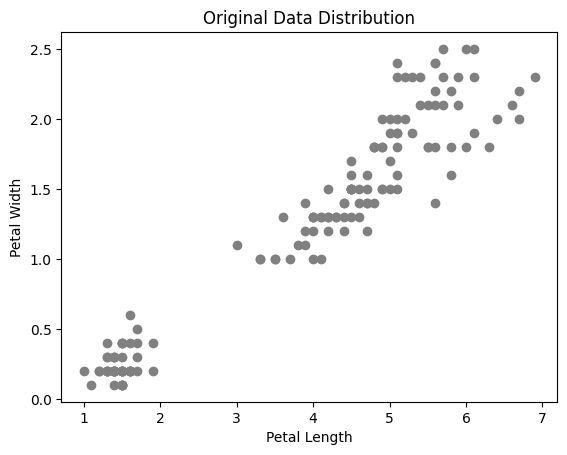

In [ ]:
# Plot the original data
plt.scatter(X[:, 0], X[:, 1], c='gray')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Original Data Distribution")
plt.show()

# **Step 2: Define core helper functions**

In [ ]:
def compute_distances(X, centers):
    """
    Compute the Euclidean distance between each point and each center.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    return distances

def compute_loss(X, centers, assignments, lambda_reg=0.01):
    """
    Compute the total loss:
    - Sum of squared distances between points and their assigned centers
    - Plus Ridge regularization on the centers
    """
    loss = 0.0
    for i in range(X.shape[0]):
        center = centers[assignments[i]]
        loss += np.sum((X[i] - center) ** 2)
    loss += lambda_reg * np.sum(centers ** 2)  # Ridge regularization
    return loss

def update_centers_batch(X, centers, assignments, lr=0.01, lambda_reg=0.01):
    """
    Update cluster centers using Batch Gradient Descent.
    """
    K = centers.shape[0]
    gradients = np.zeros_like(centers)

    for k in range(K):
        assigned_points = X[assignments == k]
        if assigned_points.shape[0] > 0:
            gradient = -2 * np.sum(assigned_points - centers[k], axis=0)
            gradient += 2 * lambda_reg * centers[k]
            gradients[k] = gradient

    centers = centers - lr * gradients
    return centers

def update_centers_sgd(X, centers, assignments, lr=0.01, lambda_reg=0.01):
    """
    Update cluster centers using Stochastic Gradient Descent (SGD).
    """
    K = centers.shape[0]
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for idx in indices:
        k = assignments[idx]
        gradient = -2 * (X[idx] - centers[k]) + 2 * lambda_reg * centers[k]
        centers[k] = centers[k] - lr * gradient
    return centers


# **Step 3: Build the K-Means algorithm**

In [ ]:
def kmeans(X, K=3, epochs=100, lr=0.01, lambda_reg=0.01, method="batch", verbose=True):
    """
    Apply K-Means clustering with gradient-based center updates.

    Arguments:
    - X: input data
    - K: number of clusters
    - epochs: number of training iterations
    - lr: learning rate
    - lambda_reg: Ridge regularization strength
    - method: "batch" or "sgd"
    - verbose: whether to print loss every 10 epochs
    """
    np.random.seed(42)
    # Initialize centers randomly from the data points
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centers = X[random_indices]

    loss_history = []

    for epoch in range(epochs):
        distances = compute_distances(X, centers)
        assignments = np.argmin(distances, axis=1)

        loss = compute_loss(X, centers, assignments, lambda_reg)
        loss_history.append(loss)

        if method == "batch":
            centers = update_centers_batch(X, centers, assignments, lr, lambda_reg)
        elif method == "sgd":
            centers = update_centers_sgd(X, centers, assignments, lr, lambda_reg)
        else:
            raise ValueError("Invalid method! Choose 'batch' or 'sgd'.")

        if verbose and epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return centers, assignments, loss_history


# **Step 4: Train and visualize results**

Epoch 0: Loss = 73.9941
Epoch 10: Loss = 52.3661
Epoch 20: Loss = 43.8062
Epoch 30: Loss = 37.6640
Epoch 40: Loss = 34.5979
Epoch 50: Loss = 33.2959
Epoch 60: Loss = 32.5485
Epoch 70: Loss = 32.2997
Epoch 80: Loss = 32.1485
Epoch 90: Loss = 32.1273
Epoch 0: Loss = 73.9941
Epoch 10: Loss = 51.5093
Epoch 20: Loss = 41.5205
Epoch 30: Loss = 35.5687
Epoch 40: Loss = 33.2234
Epoch 50: Loss = 32.2931
Epoch 60: Loss = 32.0365
Epoch 70: Loss = 32.0164
Epoch 80: Loss = 32.1354
Epoch 90: Loss = 32.2291


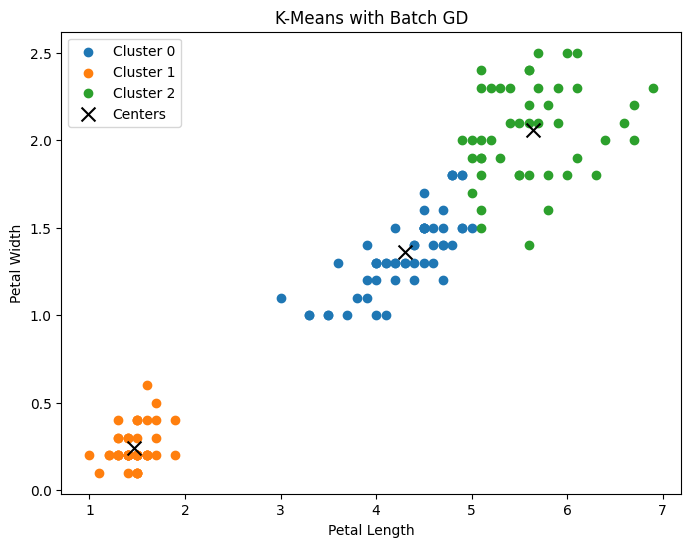

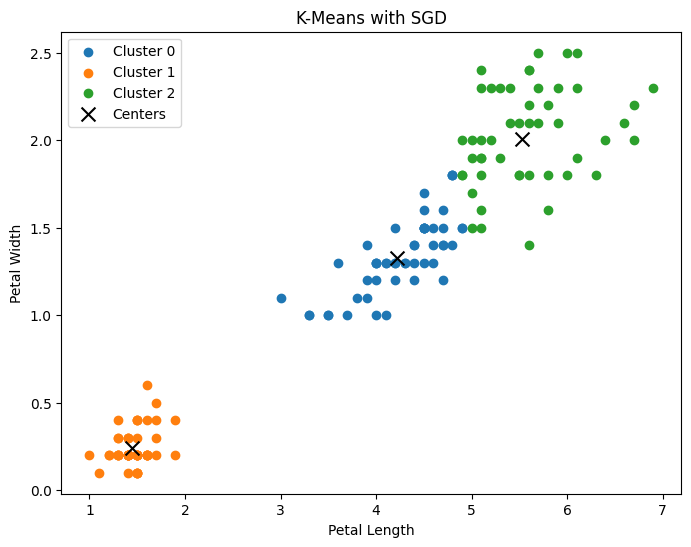

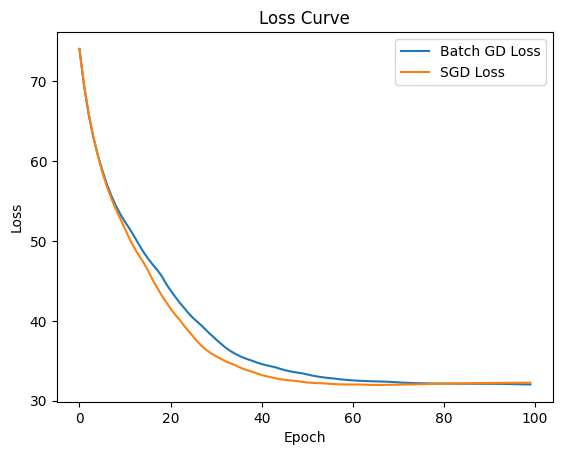

In [ ]:
# Apply KMeans with Batch Gradient Descent
centers_batch, assignments_batch, loss_batch = kmeans(
    X, K=3, epochs=100, lr=0.001, lambda_reg=0.01, method="batch"
)

# Apply KMeans with Stochastic Gradient Descent
centers_sgd, assignments_sgd, loss_sgd = kmeans(
    X, K=3, epochs=100, lr=0.001, lambda_reg=0.01, method="sgd"
)

# --------- Visualization ---------
def plot_clusters(X, centers, assignments, title="K-Means Clustering"):
    """
    Plot the clustered points with different colors.
    """
    plt.figure(figsize=(8,6))
    for k in range(centers.shape[0]):
        cluster_points = X[assignments == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {k}")
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Centers')
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()
    plt.title(title)
    plt.show()

# Plot clustering results
plot_clusters(X, centers_batch, assignments_batch, title="K-Means with Batch GD")
plot_clusters(X, centers_sgd, assignments_sgd, title="K-Means with SGD")

# Plot the Loss Curve
plt.plot(loss_batch, label='Batch GD Loss')
plt.plot(loss_sgd, label='SGD Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()
